# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

In [92]:
data= pd.read_csv('Wholesale_Data.csv')

#The dataset shows no missing values and all have int data type
# The region is 3 throughout the dataset. we can remove it and the daset can be
# 'Region 3 Wholesale Data'
df_columns= ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

df= data[df_columns]
#data.describe() shows data distribution:
#throughout the data, mean is close to std, and both are closer to max in relation to min. this shows that there are outliers

df['Tot_by_Channel'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']
df 

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Tot_by_Channel
0,2,12669,9656,7561,214,2674,1338,34112
1,2,7057,9810,9568,1762,3293,1776,33266
2,2,6353,8808,7684,2405,3516,7844,36610
3,1,13265,1196,4221,6404,507,1788,27381
4,2,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,73302
436,1,39228,1431,764,4510,93,2346,48372
437,2,14531,15488,30243,437,14841,1867,77407
438,1,10290,1981,2232,1038,168,2125,17834


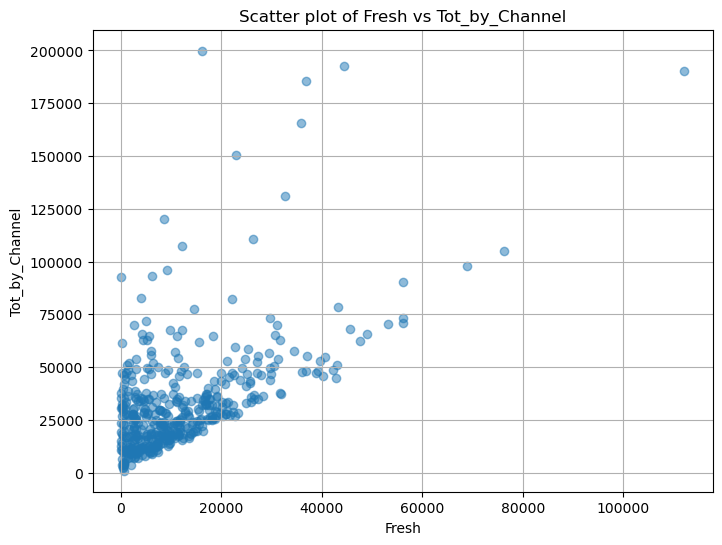

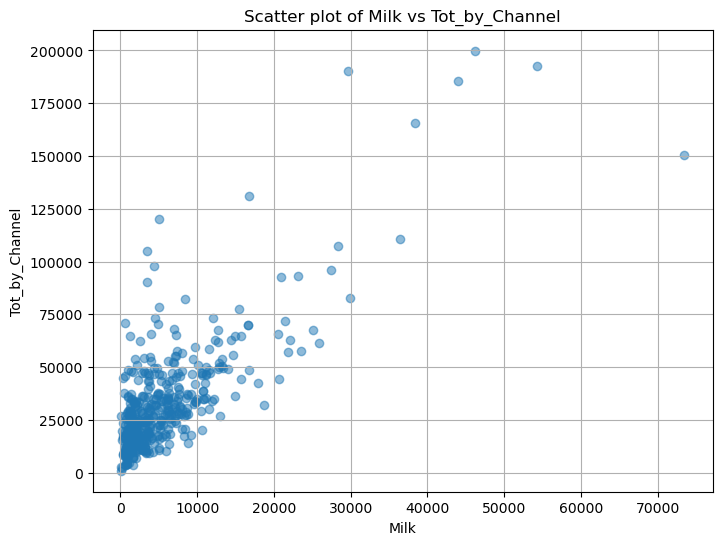

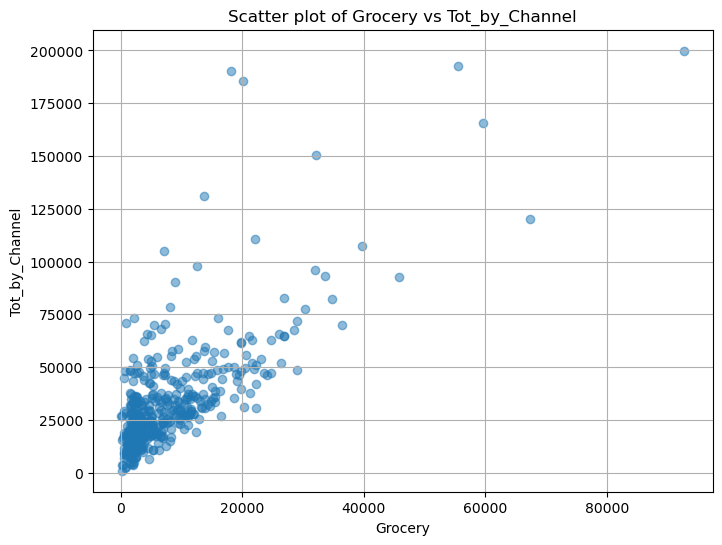

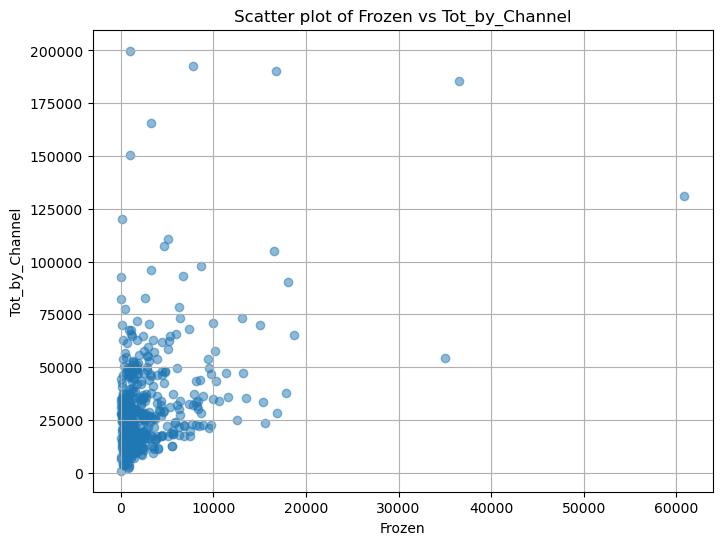

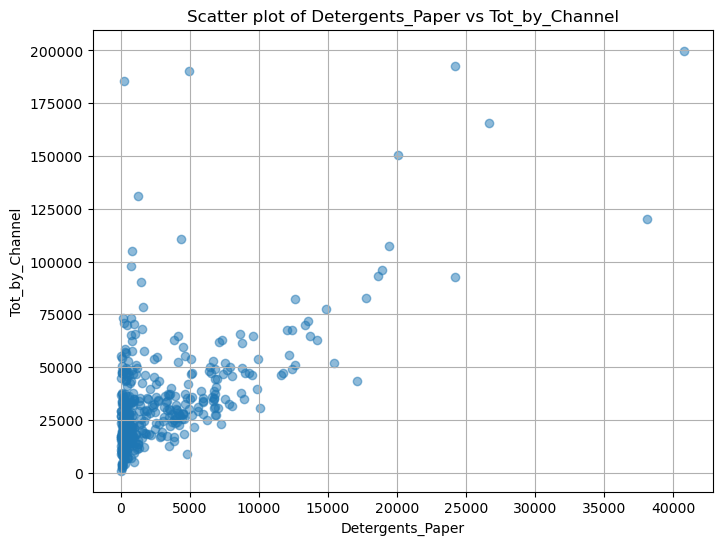

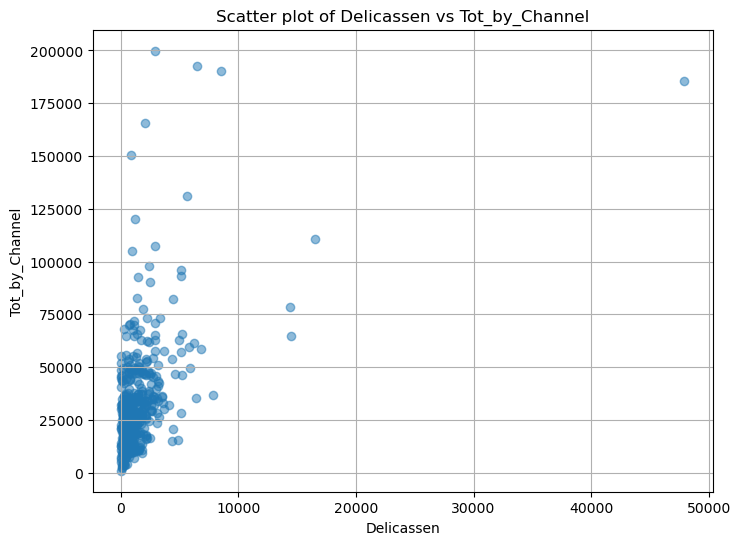

In [102]:
#Were are going to check if there is any correlation between Channel and other variables by using scatterplot
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']  # List of columns to create scatter plots for
target_column ='Tot_by_Channel'  # Name of the target column

# looping to create scatterplot
for col in columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col], df[target_column], alpha=0.5)
    plt.title(f"Scatter plot of {col} vs {target_column}")
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()

In [103]:
#These scatter plot shows us that there is a correlation between the 5 variables and Tot_by_Channel

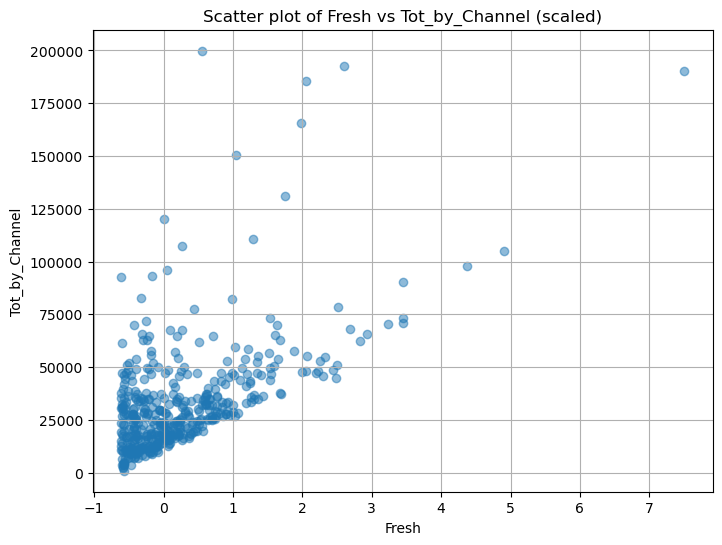

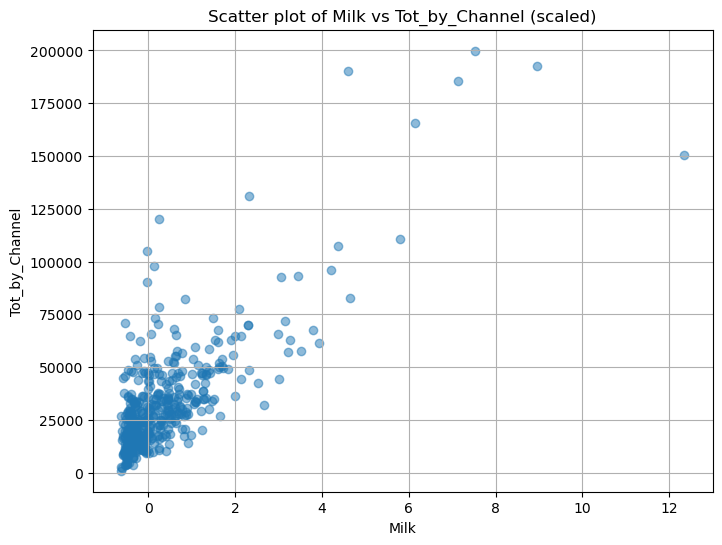

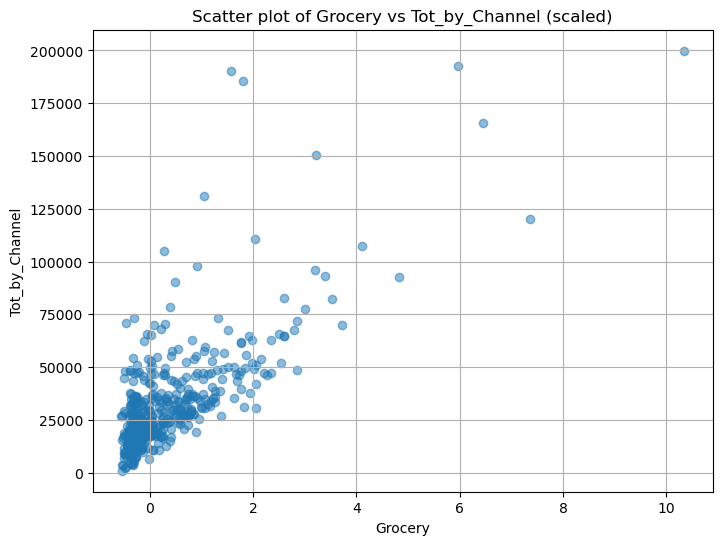

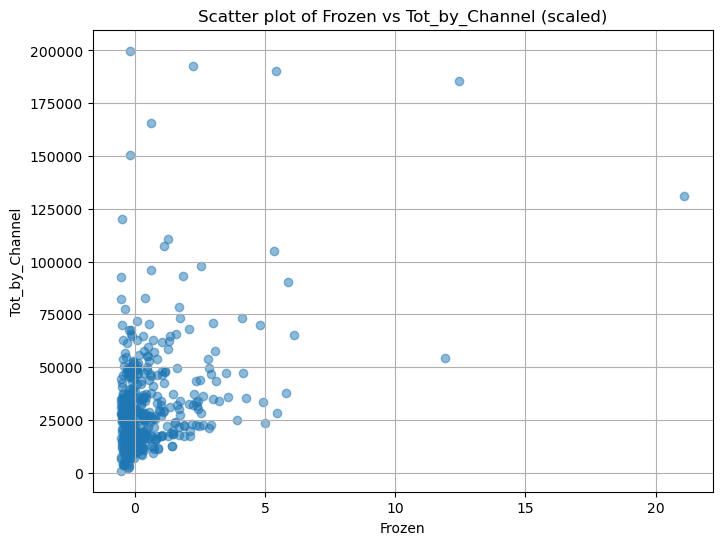

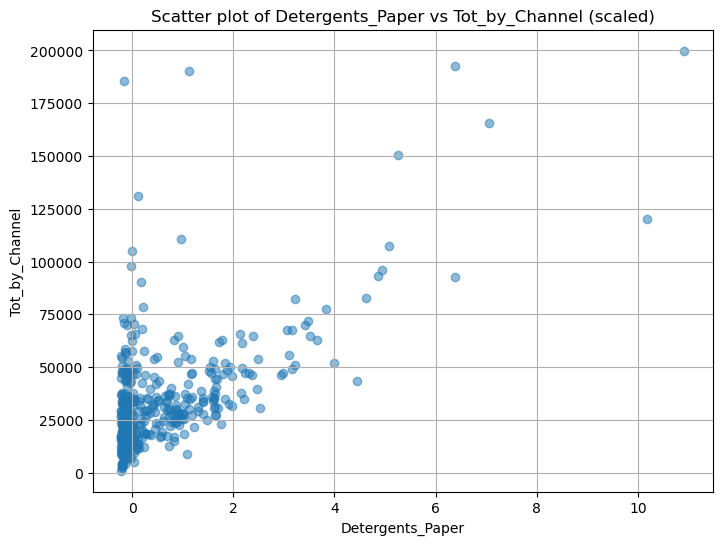

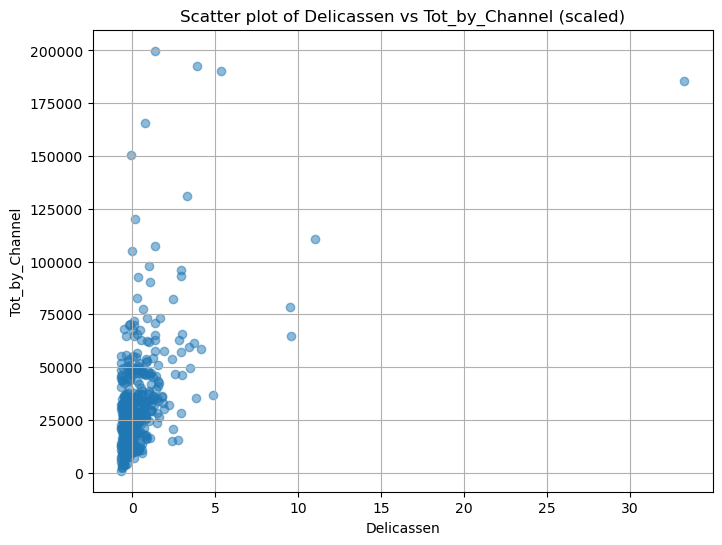

In [110]:
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']  # List of columns to create scatter plots for
target_column ='Tot_by_Channel'  # Name of the target column

scaler = RobustScaler()
df_scaled = df.copy()  
df_scaled[columns] = scaler.fit_transform(df_scaled[columns])

# Visualize the scaled data
for col in columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_scaled[col], df_scaled[target_column], alpha=0.5)
    plt.title(f"Scatter plot of {col} vs {target_column} (scaled)")
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

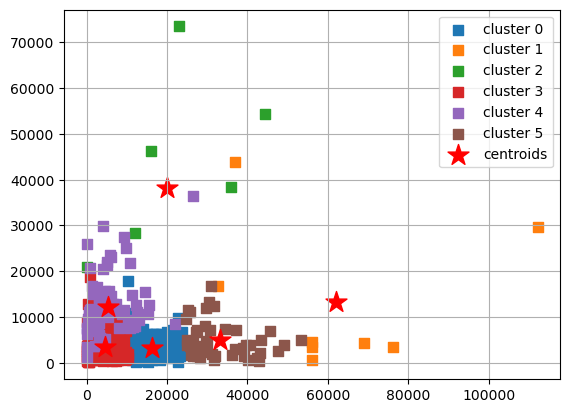

In [135]:
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] # Replace with the actual column names from your DataFrame
X = df[columns]

# data features
X = df[columns]
y = df['Tot_by_Channel']

# fitting model
km = KMeans(n_clusters=6, n_init=10, random_state=0)

# Fit and predict
y_km = km.fit_predict(X)

# Plot clustering result
plot_clusters(X.values, y_km, plt_cluster_centers=True)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.